In [1]:
!pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.1 MB/s eta 0:00:00
  Creat

Language more than a bag of words and recent language models proved to be capturing that notion.

Text Clustering used for

1. Finding outliers.
2. Speedup Labeling.
3. Finding incorectly labeled data.



In [2]:
# Load data from Hugging Face
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]
# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

# Common pipeline for Text Clustering

1. Convert the input documents into embeddedings with an *embedding model*.
2. Reduce the dimensionality of the model
3. Find group of semantically similar documents with a *cluster model*.

## Embedding models

Convert textual data into embeddings. Like $n$ documents converted into $n \times 512$ embedding dimension.

Most embedding model focus on **semantic similarity**.




In [3]:
from sentence_transformers import SentenceTransformer

#Create an embedding for each abstract

embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [4]:
embeddings.shape

(44949, 384)

Each embedding has 384 values that together represent the semantic representation of the document.

As the number of dimensions increase, there is an exponential growth in the number of possible values within each dimension.



In [5]:
from umap import UMAP
# We reduce the input embeddings from 384 dimensions to 5  dimensions
umap_model = UMAP(n_components=5, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [6]:
from hdbscan import HDBSCAN
# We fit the model and extract the clusters
hdbscan_model = HDBSCAN( min_cluster_size=50, metric="euclidean", cluster_selection_method="eom").fit(reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [7]:
clusters = hdbscan_model.labels_

In [8]:
len(set(clusters))

153

# Inspecting the clusters

In [9]:
import numpy as np
# Print first three documents in cluster 0
cluster = 0
for index in np.where(clusters==cluster)[0][:3]:
  print(abstracts[index][:300] + "... \n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



We can take this one step further and attempt to visualize our results instead
of going through all documents manually. To do so, we will need to reduce
our document embeddings to two dimensions, as that allows us to plot the
documents on an x/y plane:

In [10]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(-7.778345727920533,
 10.878833436965943,
 -1.711702972650528,
 16.388065367937088)

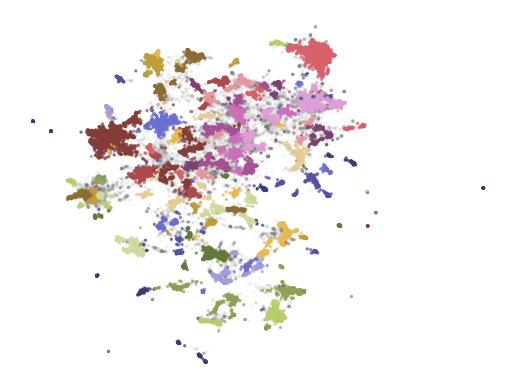

In [11]:
import matplotlib.pyplot as plt
# Plot outliers and non-outliers separately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(clusters_df.x, clusters_df.y,c=clusters_df.cluster.astype(int),alpha=0.6, s=2, cmap="tab20b")
plt.axis("off")

However we do not see what is happening within the clusters, which is possible via topic modelling.

# Topic Modelling

Topic modeling is finding a set of keywords or phrases that best represent anc capture the meaning of the topic

Classic approaches, like **latent Dirichlet allocation**, assume that each topic
is characterized by a probability distribution of words in a corpus’s
vocabulary.

These approaches generally use a bag-of-words technique for the main
features of the textual data, which does not take the **context** nor the **meaning of words and phrases** into account.

## BERTopic: Modular Topic Modeling Framework

BERTopic is a topic modeling technique that leverages clusters of
semantically similar texts to extract various types of topic representations. The algorithm consists of two steps

1. We embed documents, reduce their dimensionality, and finally cluster the reduced embedding to create groups of semantically similar documents.

2. Modelling a distribution over words in the corpus’s vocabulary by
leveraging a classic method, namely bag-of-words.


Two caveats are available however.

1. This is a representation on a document level and we are interested in a cluster-level perspective. *Frequency of words are calculated within the cluster instead of only document*.
2. Stop words appear which do not provide clear meaning. BERTopic uses a class based variant of term frequency–inverse document frequency **(c-TF-IDF)** to
**put more weight** on words that are more meaningful to a cluster and put less
weight on words that are used across all clusters. Each word in the bag-of-words, the c-TF in c-TF-IDF, is multiplied by the
IDF value of each word

Inverse document frequency is defined by:

${IDF} = \log \left ( \frac{A}{cf_x} + 1 \right ) $ where it is average frequency divided by the total frequency of each word.

A major advantage of this pipeline is that the two steps, clustering and topic
representation, are largely independent of one another.

c-TD-IDF we are not dependant on the models used in clustering the documents.
This allows significant modularity throughout every component in the pipeline.

The modularity of BERTopic has another advantage: it allows it to be
used and adapted to different use cases using the same base model. For
instance, BERTopic supports a wide variety of algorithmic variants:

Further links to the topic modelling is given [as follows](https://github.com/MaartenGr/BERTopic).

In [12]:
from bertopic import BERTopic

# Train our model with our previously defined models
topic_model = BERTopic(
                embedding_model=embedding_model,
                umap_model=umap_model,
                hdbscan_model=hdbscan_model,
                verbose=True).fit(abstracts, embeddings)

2025-01-09 06:17:11,454 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-09 06:18:11,582 - BERTopic - Dimensionality - Completed ✓
2025-01-09 06:18:11,584 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-09 06:18:13,694 - BERTopic - Cluster - Completed ✓
2025-01-09 06:18:13,710 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-09 06:18:18,195 - BERTopic - Representation - Completed ✓


In [13]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0       -1  14462                               -1_the_of_and_to   
1        0   2241                 0_question_questions_qa_answer   
2        1   2098                   1_speech_asr_recognition_end   
3        2    903               2_image_visual_multimodal_images   
4        3    887  3_summarization_summaries_summary_abstractive   
..     ...    ...                                            ...   
148    147     54           147_counseling_mental_therapy_health   
149    148     53                     148_chatgpt_its_openai_has   
150    149     52                149_mixed_code_sentiment_mixing   
151    150     51   150_diffusion_generation_autoregressive_text   
152    151     51         151_coherence_discourse_paragraph_text   

                                        Representation  \
0    [the, of, and, to, in, we, for, that, language...   
1    [question, questions, qa, answer, answering, a...   
2    [speech, asr, recognition, end, acoustic, audi...   
3    [image, visual, multimodal, images, vision, mo...   
4    [summarization, summaries, summary, abstractiv...   
..                                                 ...   
148  [counseling, mental, therapy, health, psychoth...   
149  [chatgpt, its, openai, has, it, tasks, capabil...   
150  [mixed, code, sentiment, mixing, english, anal...   
151  [diffusion, generation, autoregressive, text, ...   
152  [coherence, discourse, paragraph, text, cohesi...   

                                   Representative_Docs  
0    [  Cross-lingual text classification aims at t...  
1    [  Question generation (QG) attempts to solve ...  
2    [  End-to-end models have achieved impressive ...  
3    [  In this paper we propose a model to learn m...  
4    [  We present a novel divide-and-conquer metho...  
..                                                 ...  
148  [  Mental health care poses an increasingly se...  
149  [  Over the last few years, large language mod...  
150  [  In today's interconnected and multilingual ...  
151  [  Diffusion models have achieved great succes...  
152  [  While there has been significant progress t...  

[153 rows x 5 columns]

In [14]:
topic_model.get_topic(0)

[('question', 0.021262463291547223),
 ('questions', 0.015866039067984204),
 ('qa', 0.015830640927795868),
 ('answer', 0.015787698152510205),
 ('answering', 0.014859992848422435),
 ('answers', 0.00992918704536005),
 ('retrieval', 0.009497931820914705),
 ('comprehension', 0.007719047154229789),
 ('reading', 0.007175282051339653),
 ('knowledge', 0.0063049421989358)]

Let us find some topics to find similarities

In [15]:
topic_model.find_topics("reinforcement learning")

([9, 65, 24, 86, -1],
 [0.90451735, 0.8901315, 0.88409734, 0.88030374, 0.87587214])

In [16]:
topic_model.get_topic(24)

[('dialogue', 0.03552415515975098),
 ('dialog', 0.034597813529224),
 ('oriented', 0.02248208520461985),
 ('policy', 0.02005943040210764),
 ('user', 0.015479390695976912),
 ('tod', 0.015133916110877582),
 ('action', 0.012531663248975361),
 ('reinforcement', 0.012396152445451572),
 ('end', 0.011822844976225535),
 ('learning', 0.01154444075500628)]

In [17]:
topic_model.topics_[titles.index("BERTopic: Neural topic modeling with a class-based TF-IDF procedure")]

22

Best practices to retrieve the topic faster given [here](https://maartengr.github.io/BERTopic/getting_started/best_practices/best_practices.html#data).

We can visualize the topic in the documents as:

In [18]:
fig = topic_model.visualize_documents(titles, reduced_embeddings = reduced_embeddings, width = 1200, hide_annotations = True)

# Update fonts of the legends for easier visualization
fig.update_layout(font=dict(size=16))

In [19]:
topic_model.visualize_barchart()

In [20]:
# Visualize relationships between topics
topic_model.visualize_heatmap(n_clusters=30)

In [21]:
# Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

## Adding a special lego block

Disadvantage of BERTopic : Represents a topic through bag-of-words without taking semantic structures.

Solution: Leverage the strength of the bag-of-words representation. Tweak it using the slower techniques like embedding models.

Rerank the initial distribution of words --> improving the resulting representation.

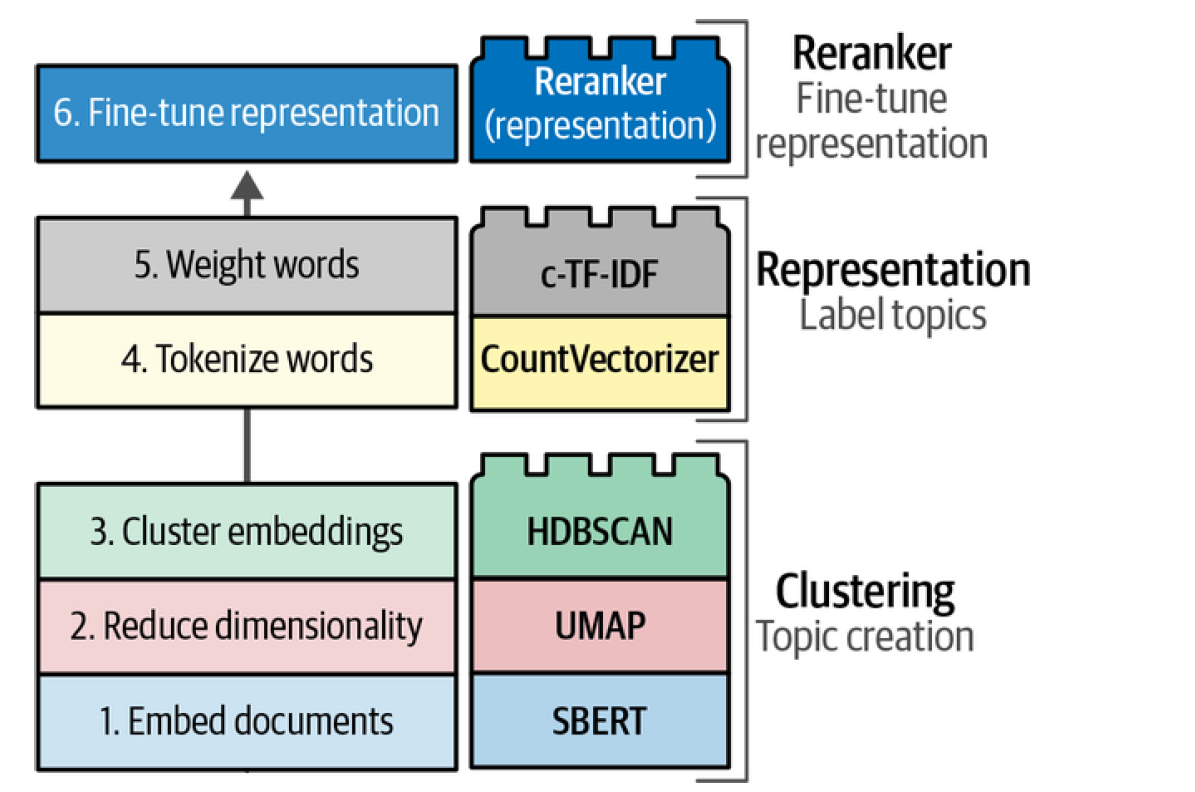

Reranker models are called **representation models**.

**Benefit** : Optimization of topic representations only needs to be done as many we have topics. It is needed for only each topic not document hence this step is scalable.

First we need to save our original topic representations, easier to compare with and without representation models.




In [22]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

Create a short wrapper that can use to quickly visualize the differences in topic words to compare with and without representation models:



In [23]:
def topic_differences(model, original_topics, nr_topics=5):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in range(nr_topics):

        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]

    return df

## KeyBERTInspired


KeyBERT extracts keywords from texts by comparing word and document
embeddings through cosine similarity.

Due to the modular nature of BERTopic, we can update our initial topic
representations with KeyBERTInspired without needing to perform the
dimensionality reduction and clustering steps:

In [24]:
from bertopic.representation import KeyBERTInspired

# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

In [25]:
# SHow topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                             Updated  
0  answering | questions | answer | question | co...  
1  phonetic | encoder | language | speech | trans...  
2  captioning | multimodal | visual | visually | ...  
3  summarization | summarizers | summaries | summ...  
4  translation | translate | translated | transla...

## Maximum Margin Relevance

In [26]:
from bertopic.representation import MaximalMarginalRelevance

In [27]:
# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.2)

topic_model.update_topics(abstracts, representation_model=representation_model)

In [28]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                             Updated  
0  questions | answering | retrieval | comprehens...  
1           speech | asr | audio | model | automatic  
2       visual | multimodal | modal | captions | vqa  
3  summarization | summaries | abstractive | eval...  
4  translation | nmt | neural | parallel | multil...

Both KeyBERTInspired and MMR are amazing techniques for improving the first set of topic representations.

KeyBERTInspired especially tends to remove nearly all stop
words since it focuses on the semantic relationships between words and documents.

Two components of the illustrated prompts

1. Documents are inserted using the [DOCUMENTS] tag are a small subset of documents typically four representing the topic. The documents with
the highest cosine similarity of their c-TF-IDF values with those of the
topic are selected.
2. The keywords that make up a topic are also passed to the prompt and referenced using the [KEYWORDS] tag.



In [29]:
from transformers import pipeline
from bertopic.representation import TextGeneration
prompt = """I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: '[KEYWORDS]'.
Based on the documents and keywords, what is this topic about?"""

In [31]:
# Update our topic representations using Flan-T5
generator = pipeline("text2text-generation", model="google/flan-t5-small")
representation_model = TextGeneration(generator, prompt=prompt, doc_length=50,tokenizer="whitespace")
topic_model.update_topics(abstracts, representation_model=representation_model)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 153/153 [00:16<00:00,  9.30it/s]


In [32]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                  Updated  
0  Question answering systems |  |  |  |   
1          Speech recognition |  |  |  |   
2     Image-language learning |  |  |  |   
3               Summarization |  |  |  |   
4                Science/Tech |  |  |  |